In [1]:
from __future__ import division, print_function

%matplotlib inline

In [2]:
path = "data/dogscats/sample/" #run on a very small subset to check script. todo : exploit GPU :-|

In [3]:
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

#### check your ~/.keras/keras.json!
this lesson runs over Theanos instead of TensorFlow:
check that ~/.keras/keras.json is set for Theano and includes "image_data_format": "channels_first"

~/.keras/keras.json  

    {
        "image_dim_ordering": "th",
        "image_data_format": "channels_first",
        "epsilon": 1e-07,
        "floatx": "float32",
        "backend": "theano"
    }

In [6]:
from importlib import reload  # Python 3
import utils; reload(utils)
from utils import plots

In [31]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
#batch_size = 1
batch_size = 4 #for plotting
#batch_size = 64

In [32]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [33]:
#create vgg16 object
vgg = Vgg16()

In [34]:
# use pretrained vgg16 model
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)


Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [35]:
imgs,labels = next(batches)

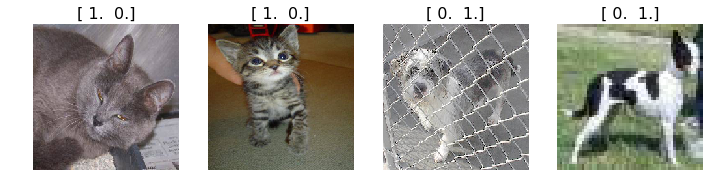

In [36]:
plots(imgs, titles=labels)

In [37]:
vgg.predict(imgs, True)

(array([ 0.1775,  0.4114,  0.172 ,  0.0587], dtype=float32),
 array([281, 281, 170,  50], dtype=int64),
 ['tabby', 'tabby', 'Irish_wolfhound', 'American_alligator'])

In [38]:
#show default vgg16 classes
vgg.classes[:10]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

In [39]:
#specialize model
batch_size = 64
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [41]:
#modify model
vgg.finetune(batches)

In [42]:
#then retrain it
vgg.fit(batches, val_batches, batch_size, nb_epoch=1)

Epoch 1/1
1/1 [==============================] - 17s - loss: 1.6097 - acc: 0.4333 - val_loss: 0.6731 - val_acc: 0.7000


Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


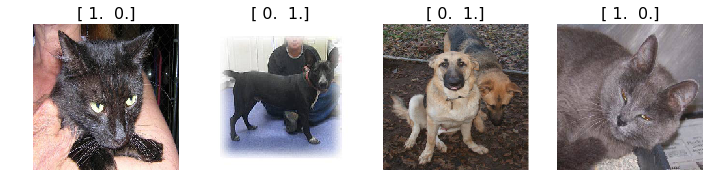

In [43]:
#show results
batch_size = 4
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [44]:
vgg.predict(imgs, True)

(array([ 0.9866,  0.997 ,  0.6033,  0.505 ], dtype=float32),
 array([0, 1, 1, 1], dtype=int64),
 ['cats', 'dogs', 'dogs', 'dogs'])

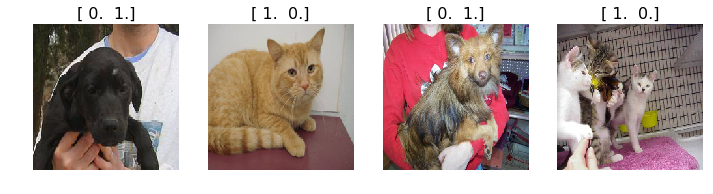

In [45]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [46]:
vgg.predict(imgs, True)

(array([ 0.6552,  0.6374,  0.932 ,  0.6527], dtype=float32),
 array([1, 0, 0, 1], dtype=int64),
 ['dogs', 'cats', 'cats', 'dogs'])